# Advent of Code - 2024 - Day 24 - Problem 4

https://adventofcode.com/2024/day/24


## Load Source Data

Load the map data into `DATA`.

In [1]:
f = open("data/day24.txt", "r")
DATA = list(map(str.strip, f.readlines()))
f.close()

# DATA = """x00: 1
# x01: 0
# x02: 1
# x03: 1
# x04: 0
# y00: 1
# y01: 1
# y02: 1
# y03: 1
# y04: 1

# ntg XOR fgs -> mjb
# y02 OR x01 -> tnw
# kwq OR kpj -> z05
# x00 OR x03 -> fst
# tgd XOR rvg -> z01
# vdt OR tnw -> bfw
# bfw AND frj -> z10
# ffh OR nrd -> bqk
# y00 AND y03 -> djm
# y03 OR y00 -> psh
# bqk OR frj -> z08
# tnw OR fst -> frj
# gnj AND tgd -> z11
# bfw XOR mjb -> z00
# x03 OR x00 -> vdt
# gnj AND wpb -> z02
# x04 AND y00 -> kjc
# djm OR pbm -> qhw
# nrd AND vdt -> hwm
# kjc AND fst -> rvg
# y04 OR y02 -> fgs
# y01 AND x02 -> pbm
# ntg OR kjc -> kwq
# psh XOR fgs -> tgd
# qhw XOR tgd -> z09
# pbm OR djm -> kpj
# x03 XOR y03 -> ffh
# x00 XOR y04 -> ntg
# bfw OR bqk -> z06
# nrd XOR fgs -> wpb
# frj XOR qhw -> z04
# bqk OR frj -> z07
# y03 OR x01 -> nrd
# hwm AND bqk -> z03
# tgd XOR rvg -> z12
# tnw OR pbm -> gnj"""
# DATA = list(map(str.strip, DATA.splitlines()))

DATA

['x00: 1',
 'x01: 0',
 'x02: 1',
 'x03: 1',
 'x04: 0',
 'x05: 0',
 'x06: 1',
 'x07: 1',
 'x08: 0',
 'x09: 1',
 'x10: 1',
 'x11: 1',
 'x12: 1',
 'x13: 1',
 'x14: 1',
 'x15: 0',
 'x16: 0',
 'x17: 1',
 'x18: 0',
 'x19: 0',
 'x20: 0',
 'x21: 0',
 'x22: 0',
 'x23: 1',
 'x24: 0',
 'x25: 0',
 'x26: 1',
 'x27: 1',
 'x28: 0',
 'x29: 1',
 'x30: 1',
 'x31: 0',
 'x32: 0',
 'x33: 0',
 'x34: 0',
 'x35: 1',
 'x36: 0',
 'x37: 1',
 'x38: 1',
 'x39: 0',
 'x40: 1',
 'x41: 0',
 'x42: 1',
 'x43: 0',
 'x44: 1',
 'y00: 1',
 'y01: 0',
 'y02: 0',
 'y03: 1',
 'y04: 1',
 'y05: 0',
 'y06: 0',
 'y07: 0',
 'y08: 0',
 'y09: 0',
 'y10: 0',
 'y11: 1',
 'y12: 0',
 'y13: 0',
 'y14: 1',
 'y15: 1',
 'y16: 1',
 'y17: 0',
 'y18: 1',
 'y19: 0',
 'y20: 1',
 'y21: 0',
 'y22: 1',
 'y23: 0',
 'y24: 0',
 'y25: 0',
 'y26: 0',
 'y27: 1',
 'y28: 1',
 'y29: 0',
 'y30: 1',
 'y31: 1',
 'y32: 1',
 'y33: 1',
 'y34: 1',
 'y35: 0',
 'y36: 1',
 'y37: 1',
 'y38: 0',
 'y39: 0',
 'y40: 1',
 'y41: 1',
 'y42: 0',
 'y43: 1',
 'y44: 1',
 '',
 'y16

## Parse Data



In [2]:
idx_blank_line = DATA.index("")

GATES = {}
OPS = {}

for line in DATA[:idx_blank_line]:
    fields = line.split(": ")
    gate = fields[0]
    value = fields[1]

    GATES[gate] = value

for line in DATA[idx_blank_line + 1 :]:
    fields = line.split(" ")
    input_1 = fields[0]
    op = fields[1]
    input_2 = fields[2]
    output = fields[4]

    if input_1 not in GATES:
        GATES[input_1] = None
    if input_2 not in GATES:
        GATES[input_2] = None
    if output not in GATES:
        GATES[output] = None

    OPS[output] = (input_1, op, input_2)

## Create Dependency Graph

Creates a DAG where the edges point from source gates to target gates.

Example: Assume the following rule:

```
bfw XOR mjb -> z00
```

The `OPS` dictionary contains:

```
OPS['z00'] = ('bfw', 'XOR', 'mjb')
```

We will add the following edges to the DAG:

```
bfw --> z00
mjb --> z00
```

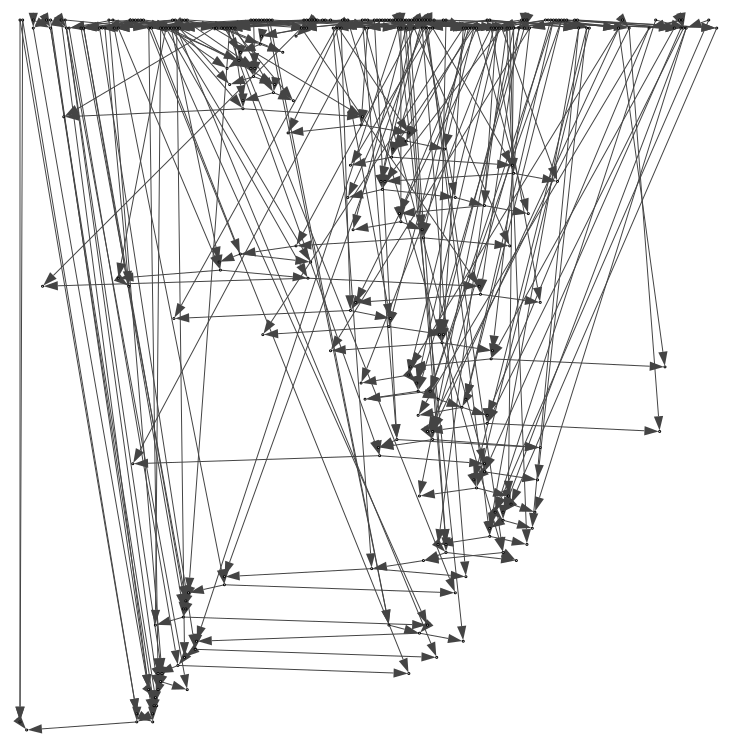

In [3]:
# import matplotlib.pyplot as plt
import igraph as ig

edges = [(OPS[key][0], key) for key in OPS]
edges.extend([(OPS[key][2], key) for key in OPS])
DAG = ig.Graph.TupleList(edges, directed=True)

# DAG.vs["label"] = DAG.vs["name"]
# DAG.layout_kamada_kawai()
# fig, ax = plt.subplots(figsize=(10,10))
ig.plot(
    DAG,
    layout="sugiyama",
    # target=ax,
    # edge_width=0.1,
    vertex_size=2,
    vertex_color="white",
    bbox=(750, 750),
)


# plt.show()

## Define is_less_than

Node A is less than node B if A must be computed before B.

In [4]:
def compare_gates(lhs, rhs):

    # print(f"compare_gates({lhs}, {rhs})")

    lhs_index = DAG.vs.find(name=lhs).index
    rhs_index = DAG.vs.find(name=rhs).index

    # print(f"lhs_index = {lhs_index}")
    # print(f"rhs_index = {rhs_index}")

    try:

        if lhs_index == rhs_index:
            result = 0
        else:
            paths = DAG.get_shortest_paths(lhs_index, to=rhs_index)
            if paths != [[]]:
                result = -1
            else:
                paths = DAG.get_shortest_paths(rhs_index, to=lhs_index)
                if paths != [[]]:
                    result = 1
                else:
                    if lhs < rhs: 
                        result= -1
                    else:
                        result= 1

        print(f"compare {lhs}, {rhs} = {result}")

        return result
    
    except:
        print("something went wrong")


#'ntg XOR fgs -> mjb'
# assert compare_gates('ntg','mjb') == -1
# assert compare_gates('fgs','mjb')== -1
# assert  compare_gates('mjb','ntg') == 0

print(compare_gates("x00", "x01"))

compare x00, x01 = -1
-1


/tmp/ipykernel_6345/4253836261.py:16: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = DAG.get_shortest_paths(lhs_index, to=rhs_index)
/tmp/ipykernel_6345/4253836261.py:20: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = DAG.get_shortest_paths(rhs_index, to=lhs_index)


## Determine Evaluation Order

In [14]:
import functools

def cmp_to_key(mycmp):
    'Convert a cmp= function into a key= function'
    class K(object):
        def __init__(self, obj, *args):
            print('obj created with ',obj)
            self.obj = obj
        def __lt__(self, other):
            print('comparing less than ',self.obj, other.obj)
            return mycmp(self.obj, other.obj) < 0
        def __gt__(self, other):
            print('comparing greter than ',self.obj)
            return mycmp(self.obj, other.obj) > 0
        def __eq__(self, other):
            print('comparing equal to ',self.obj)
            return mycmp(self.obj, other.obj) == 0
        def __le__(self, other):
            print('comparing less than equal ',self.obj)
            return mycmp(self.obj, other.obj) <= 0
        def __ge__(self, other):
            print('comparing greater than equal',self.obj)
            return mycmp(self.obj, other.obj) >= 0
        def __ne__(self, other):
            print('comparing not equal ',self.obj)
            return mycmp(self.obj, other.obj) != 0
    return K

ordered_gates = sorted(GATES.keys(), key=cmp_to_key(compare_gates))

for g in ordered_gates:
    print(g)


def get_value(gate_name):
    value = GATES[gate_name]
    if value == None:
        #raise Exception(f"gate {gate_name} does not have a value.")
        value = evaluate(OPS[gate_name])
        GATES[gate_name] = value
    return value


def evaluate(expression):
    lhs, op, rhs = expression
    lhs_value = get_value(lhs)
    rhs_value = get_value(rhs)
    if op == "AND":
        return "1" if lhs_value == "1" and rhs_value == "1" else "0"
    if op == "OR":
        return "1" if lhs_value == "1" or rhs_value == "1" else "0"
    if op == "XOR":
        return "1" if lhs_value != rhs_value else "0"
    raise Exception(f"Unknown op {op}")

sorted_gate_names = sorted(GATES.keys(), reverse=True)
print(sorted_gate_names)
result = 0
for gate_name in [g for g in sorted_gate_names if g.startswith("z")]:
    value = get_value(gate_name)
    print(f"{gate_name} = {value}")
    result *= 2
    if value == "1": result += 1
    # print(f"evaluating {gate_name}")
    # gate_value = GATES[gate_name]
    # if gate_value == None:
    #     expression = OPS[gate_name]
    #     gate_value = evaluate(expression)
    #     GATES[gate_name] = gate_value

# GATES

print(f"result = {result}")

obj created with  x00
obj created with  x01
obj created with  x02
obj created with  x03
obj created with  x04
obj created with  x05
obj created with  x06
obj created with  x07
obj created with  x08
obj created with  x09
obj created with  x10
obj created with  x11
obj created with  x12
obj created with  x13
obj created with  x14
obj created with  x15
obj created with  x16
obj created with  x17
obj created with  x18
obj created with  x19
obj created with  x20
obj created with  x21
obj created with  x22
obj created with  x23
obj created with  x24
obj created with  x25
obj created with  x26
obj created with  x27
obj created with  x28
obj created with  x29
obj created with  x30
obj created with  x31
obj created with  x32
obj created with  x33
obj created with  x34
obj created with  x35
obj created with  x36
obj created with  x37
obj created with  x38
obj created with  x39
obj created with  x40
obj created with  x41
obj created with  x42
obj created with  x43
obj created with  x44
obj create

/tmp/ipykernel_6345/4253836261.py:16: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = DAG.get_shortest_paths(lhs_index, to=rhs_index)
/tmp/ipykernel_6345/4253836261.py:20: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = DAG.get_shortest_paths(rhs_index, to=lhs_index)
